In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.dates as mdates
import matplotlib.patches as mpatches

import json
from pandas.io.json import json_normalize
from datetime import datetime
import os

yourName = 'Luke Russell'
theirName =''

In [10]:
rootDir = '../messages/inbox' # download all facebook message data into the same folder as code
dataDict = {}
for dirName, subdirList, fileList in os.walk(rootDir):

    try:
        with open("{}/message_1.json".format(dirName)) as file:
            jsonLoad = json.load(file)
        dfPerson = json_normalize(jsonLoad['messages'])

        ###if sender_names.unique == 2... so we dont deal with groups yet

        members = dfPerson['sender_name'].unique()
        for i in range(0,len(members)):
            if members[i] != yourName:
                person = members[i]
        firstName, *middleName, lastName = person.split()

        dfPerson['person'] = firstName + ' ' + lastName

        dfPerson['direction'] = np.nan
        dfPerson.loc[dfPerson['sender_name'].str.contains(yourName), 'direction'] = 'sent'
        dfPerson.loc[~dfPerson['sender_name'].str.contains(yourName), 'direction'] = 'received'


        dfPerson['date'] = dfPerson['timestamp_ms']/1000
        dfPerson['date'] = dfPerson['date'].astype(int)
        dfPerson['date'] = pd.to_datetime(dfPerson['date'], unit='s')
        dfPerson['day'] = dfPerson['date'].dt.to_period('d')
        dataDict[dirName[dirName.index('x')+2:]] = dfPerson

    except:
        pass
        # future: format="%Y.%d.%m %I:%M:%S"

In [11]:
dataDict['lukerussell']

,content,files,photos,reactions,sender_name,share,sticker,timestamp_ms,type,videos,person,direction,date,day
0,or what?,NaN,NaN,NaN,Adam Newton Wright,NaN,NaN,1554785155055,Generic,NaN,Adam Wright,received,2019-04-09 04:45:55,2019-04-09
1,just getting a better time axis?,NaN,NaN,NaN,Adam Newton Wright,NaN,NaN,1554785152018,Generic,NaN,Adam Wright,received,2019-04-09 04:45:52,2019-04-09
2,is something wrong with it?,NaN,NaN,NaN,Adam Newton Wright,NaN,NaN,1554785128627,Generic,NaN,Adam Wright,received,2019-04-09 04:45:28,2019-04-09
3,that looks dope,NaN,NaN,NaN,Adam Newton Wright,NaN,NaN,1554785123925,Generic,NaN,Adam Wright,received,2019-04-09 04:45:23,2019-04-09
4,oh what!,NaN,NaN,NaN,Adam Newton Wright,NaN,NaN,1554785120592,Generic,NaN,Adam Wright,received,2019-04-09 04:45:20,2019-04-09
5,It's on my github if you wanna give it a go,NaN,NaN,NaN,Luke Russell,NaN,NaN,1554784641003,Generic,NaN,Adam Wright,sent,2019-04-09 04:37:21,2019-04-09
6,The time think was a momentum killer tho,NaN,NaN,NaN,Luke Russell,NaN,NaN,1554784612248,Generic,NaN,Adam Wright,sent,2019-04-09 04:36:52,2019-04-09
7,Yeah I tried to,NaN,NaN,NaN,Luke Russell,NaN,NaN,1554784597191,Generic,NaN,Adam Wright,sent,2019-04-09 04:36:37,2019-04-09
8,are you currently working on this project?,NaN,NaN,NaN,Adam Newton Wright,NaN,NaN,1554784333553,Generic,NaN,Adam Wright,received,2019-04-09 04:32:13,2019-04-09
9,"communication, its tough via text",NaN,NaN,NaN,Adam Newton Wright,NaN,NaN,1554784274217,Generic,NaN,Adam Wright,received,2019-04-09 04:31:14,2019-04-09


## plotting for fb only

In [12]:
dfPerson['date'] = dfPerson['timestamp_ms']/1000
dfPerson['date'] = dfPerson['date'].astype(int)
dfPerson['date'] = pd.to_datetime(dfPerson['date'], unit='s')
dfPerson['day'] = dfPerson['date'].dt.to_period('d')
# future: format="%Y.%d.%m %I:%M:%S",

In [13]:
sent = list(dfPerson[dfPerson['direction'] == 'sent']['timestamp_ms'])
received = list(dfPerson[dfPerson['direction'] == 'received']['timestamp_ms'])

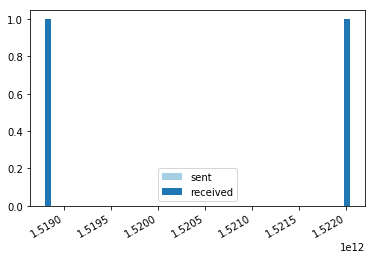

In [14]:
fig, ax = plt.subplots()

# sentpatch = mpatches.Patch(color='#a6cee3', label='sent')
# receivedpatch = mpatches.Patch(color='#1f78b4', label='received')
ax.hist([sent[:1000], received[:1000]], label=['sent','received'], bins = 50, stacked=True, color=['#a6cee3','#1f78b4'])
#sent and receive aren't perfectly equal, need a better way to specify date range
fig.autofmt_xdate()
ax.legend()
plt.show()

## Tree map

In [47]:
totalmessages = {}
people = []
messages = []
for person in dataDict:
    totalmessages[person] = len(dataDict[person])
    people.append(person)
    messages.append(len(dataDict[person]))
    
messages, people = zip(*sorted(zip(messages, people)))

In [48]:
totalmessages['lukerussell']

2561

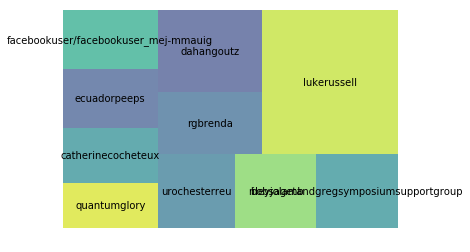

In [61]:
import squarify
squarify.plot(sizes=messages[-10:], label=people[-10:], alpha=.7 )
plt.axis('off')
plt.show()